In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Raw_train_df=pd.read_csv("kidney_disease_train.csv")

Raw_test_df=pd.read_csv("kidney_disease_test.csv")


In [ ]:
#Raw_train_df.drop(columns="id",inplace=True)


In [3]:
list(Raw_train_df.columns)

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [4]:
Raw_test_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [5]:
Raw_train_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [6]:
print(f'Shape of Train Data {Raw_train_df.shape}')
print(f'\nShape of Test Data {Raw_test_df.shape}')

Shape of Train Data (280, 26)

Shape of Test Data (120, 25)


In [7]:
Raw_train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,280.0,202.928571,111.988168,1.000,110.50,202.00,302.25,399.000
age,275.0,51.454545,17.476176,2.000,42.00,55.00,65.00,90.000
bp,271.0,76.051661,14.256289,50.000,70.00,70.00,80.00,180.000
sg,244.0,1.017439,0.005746,1.005,1.01,1.02,1.02,1.025
al,245.0,1.024490,1.375805,0.000,0.00,0.00,2.00,5.000
su,242.0,0.438017,1.073193,0.000,0.00,0.00,0.00,5.000
bgr,247.0,150.186235,77.357144,70.000,100.00,124.00,171.50,490.000
bu,266.0,56.983835,51.456635,10.000,27.25,41.00,64.75,391.000
sc,268.0,3.006157,5.850085,0.400,0.90,1.30,2.80,76.000
sod,213.0,137.255869,11.677123,4.500,135.00,138.00,141.00,163.000


In [8]:
Raw_train_df.skew()


id     -0.056679
age    -0.671129
bp      2.003336
sg     -0.166490
al      1.012426
su      2.528299
bgr     1.964349
bu      2.954937
sc      8.283930
sod    -7.123213
pot     9.860723
hemo   -0.351304
pcv    -0.482163
dtype: float64

In [9]:
cat_var=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
num_var=['id','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
print(f'Number of Categirical Variables including Label is {len(cat_var)}')
print(f'Number of Numerical Variables including Label is {len(num_var)}')

Number of Categirical Variables including Label is 13
Number of Numerical Variables including Label is 12


In [10]:
Raw_train_df.dtypes


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [11]:
Raw_train_df[Raw_train_df['wc'].map(lambda x:type(x)==str)].wc.value_counts()

9600     8
11000    8
6700     8
9800     7
10500    6
        ..
9000     1
21600    1
8200     1
5700     1
9900     1
Name: wc, Length: 78, dtype: int64

In [12]:
Raw_train_df[Raw_train_df['rc'].map(lambda x:type(x)==str)].rc.value_counts()


5.2    10
4.5    10
4.7     8
5.5     8
4.8     8
4.9     8
3.4     7
6.1     7
4.6     6
5.4     6
3.8     6
5.9     6
5.7     5
5.0     5
5.3     5
5.6     5
4.3     5
3.9     5
5.8     5
3.2     4
4.1     4
4.4     4
3.7     3
3.5     3
6.0     3
4.0     3
6.5     3
6.2     3
4.2     3
3.6     3
3.3     3
5.1     3
6.4     2
3.1     2
2.6     2
3.0     2
2.3     1
4       1
2.4     1
2.9     1
2.5     1
3       1
2.7     1
5       1
\t?     1
8.0     1
2.1     1
6.3     1
Name: rc, dtype: int64

In [13]:
train_df=Raw_train_df.copy()
train_df['wc']=pd.to_numeric(train_df['wc'],errors='coerce')
train_df['rc']=pd.to_numeric(train_df['rc'], errors='coerce')

In [14]:
train_df.dtypes


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
train_df.apply(lambda x: x.isna().value_counts()). T

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


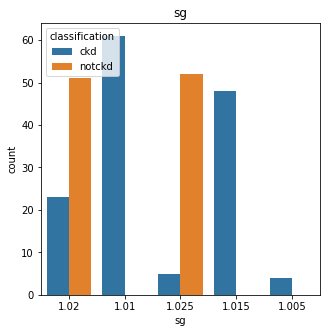

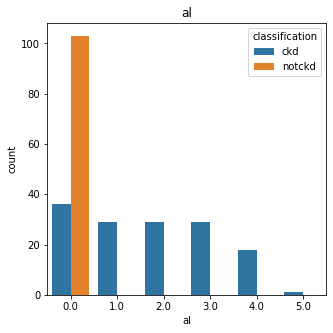

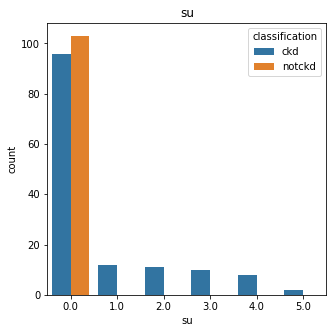

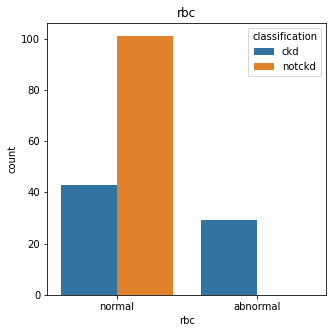

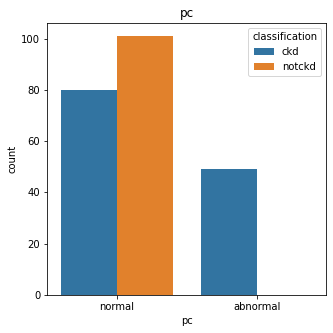

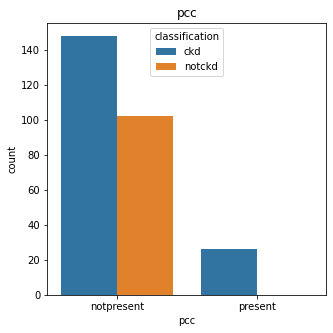

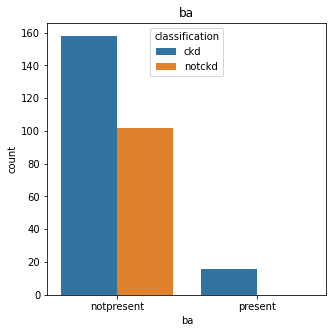

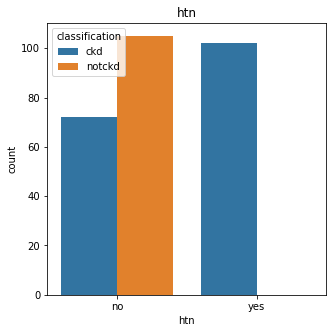

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


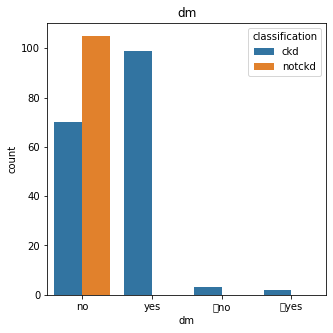

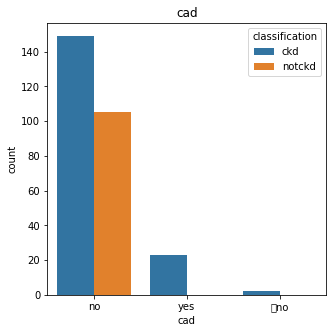

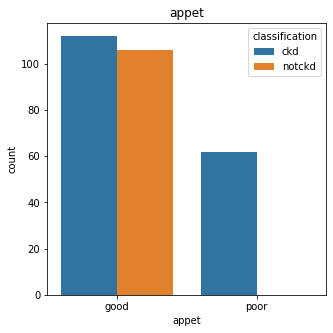

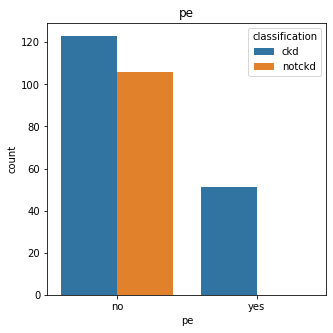

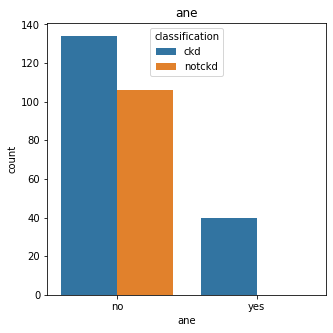

In [16]:
for feature in cat_var:
    plt.figure(figsize = (5,5))
    sns.countplot(x = feature, hue = 'classification', data = train_df, order= train_df[feature].value_counts().index)
    plt.title(feature)
                  

In [17]:
train_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200.0,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,ckd


<AxesSubplot:xlabel='classification', ylabel='count'>

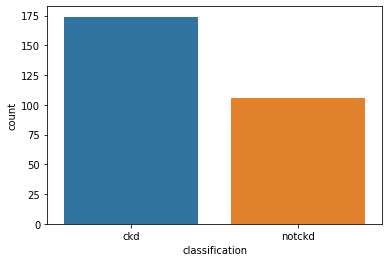

In [18]:
sns.countplot(x = 'classification',data = train_df)

In [19]:
for col in cat_var:
    print(f"Values counts for {col} are \n {train_df[col].value_counts()}")

Values counts for sg are 
 1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64
Values counts for al are 
 0.0    139
1.0     29
2.0     29
3.0     29
4.0     18
5.0      1
Name: al, dtype: int64
Values counts for su are 
 0.0    199
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64
Values counts for rbc are 
 normal      144
abnormal     29
Name: rbc, dtype: int64
Values counts for pc are 
 normal      181
abnormal     49
Name: pc, dtype: int64
Values counts for pcc are 
 notpresent    250
present        26
Name: pcc, dtype: int64
Values counts for ba are 
 notpresent    260
present        16
Name: ba, dtype: int64
Values counts for htn are 
 no     177
yes    102
Name: htn, dtype: int64
Values counts for dm are 
 no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64
Values counts for cad are 
 no      254
yes      23
\tno      2
Name: cad, dtype: int64
Values counts for appet are 
 good    218
poor     62


In [20]:
train_df['dm']=train_df.dm.replace("\tno","no")
train_df['dm']=train_df.dm.replace("\tyes","yes")

train_df['cad']=train_df.cad.replace("\tno","no")

In [21]:
print(train_df.dm.value_counts())
print(train_df.cad.value_counts())

no     178
yes    101
Name: dm, dtype: int64
no     256
yes     23
Name: cad, dtype: int64


In [22]:
train_df.apply(lambda x: x.isna().value_counts()). T

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


In [23]:
from sklearn.preprocessing import StandardScaler
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df[col]=train_df[col].fillna(train_df[col].median())

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [24]:
for col in cat_var:
    print(f'Imputing for {col} with {train_df[col].mode()[0]}')
    train_df[col]=train_df[col].fillna(train_df[col].mode()[0])

Imputing for sg with 1.02
Imputing for al with 0.0
Imputing for su with 0.0
Imputing for rbc with normal
Imputing for pc with normal
Imputing for pcc with notpresent
Imputing for ba with notpresent
Imputing for htn with no
Imputing for dm with no
Imputing for cad with no
Imputing for appet with good
Imputing for pe with no
Imputing for ane with no


In [25]:
train_df.apply(lambda x: x.isna().value_counts()). T

,False
id,280
age,280
bp,280
sg,280
al,280
su,280
rbc,280
pc,280
pcc,280
ba,280


In [26]:
train_num_df=train_df[num_var].copy()

In [27]:
train_num_df.head()


,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,157,62.0,70.0,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900.0,3.9
1,109,54.0,70.0,233.0,50.1,1.9,138.0,4.4,11.7,41.0,7900.0,4.8
2,17,47.0,80.0,114.0,87.0,5.2,139.0,3.7,12.1,41.0,7900.0,4.8
3,347,43.0,60.0,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200.0,5.5
4,24,42.0,100.0,124.0,50.0,1.4,129.0,4.0,11.1,39.0,8300.0,4.6


In [28]:
train_num_df.shape


(280, 12)

In [29]:
from scipy.stats import zscore
train_num_zscore=train_num_df.apply(zscore)

In [30]:
train_num_zscore[~(np.abs(train_num_zscore) < 3).all(axis=1)].shape

(25, 12)

In [31]:
train_num_zscore[~(np.abs(train_num_zscore) < 3).all(axis=1)]

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
11,-0.518200,0.316991,1.007324,-0.316445,5.297192,1.759003,-1.124757,0.039634,-1.706351,-1.949834,-1.525581,-1.716211
30,-1.761625,0.953039,-0.417175,-0.645219,-0.043536,3.681036,-3.288900,-0.200963,-0.058065,-0.440285,-0.124303,0.074173
34,-1.725843,-0.087766,-1.129424,4.697359,-0.023608,0.186431,0.055685,-0.080664,-1.181896,-1.446651,-0.124303,0.074173
36,-0.893911,1.415620,-0.417175,1.080845,3.204743,1.269759,0.055685,-0.080664,-0.882208,-0.440285,1.693572,-0.641981
57,0.313732,1.184330,1.719573,0.738372,3.683017,1.828895,-1.026387,0.039634,-1.181896,-1.446651,-0.124303,0.074173
62,-0.723947,-1.012927,-0.417175,-0.316445,3.244599,1.619219,-0.731277,-0.261112,-2.455572,0.188694,-0.124303,0.074173
64,-1.215949,-0.376879,0.295075,3.806929,-0.302601,-0.285341,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
65,-0.044089,0.432637,1.719573,1.437017,-0.322529,0.046647,-0.042686,0.009559,-0.507597,-1.195060,6.882090,-1.000057
73,-1.045985,0.259169,0.295075,3.669940,-0.382313,-0.180503,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
83,0.072203,0.143524,3.144071,-0.604122,-0.760947,-0.302814,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173


In [32]:
(~(np.abs(train_num_zscore) < 3)).sum(axis=0)

id      0
age     0
bp      3
bgr     7
bu      7
sc      3
sod     2
pot     2
hemo    1
pcv     1
wc      5
rc      2
dtype: int64

In [33]:
from scipy import stats
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df.loc[(np.abs(stats.zscore(train_num_df[col])) >= 3), col] = train_df[col].median()

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [34]:
train_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200.0,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,ckd


In [35]:
train_df.dtypes


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [36]:
cat_var


['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [37]:
cat_nom_dict = {"rbc":     {"normal": 1, "abnormal": 0},
                "pc":     {"normal": 1, "abnormal": 0},
                "pcc":     {"present": 1, "notpresent": 0},
                "ba":     {"present": 1, "notpresent": 0},
                "htn":     {"yes": 1, "no": 0},
                "dm":     {"yes": 1, "no": 0},
                "cad":     {"yes": 1, "no": 0},
                "pe":     {"yes": 1, "no": 0},
                "ane":     {"yes": 1, "no": 0},
                "appet":     {"good": 1, "poor": 0},
                "classification":     {"ckd": 1, "notckd": 0} 
               }

In [38]:
cat_nom_dict


{'rbc': {'normal': 1, 'abnormal': 0},
 'pc': {'normal': 1, 'abnormal': 0},
 'pcc': {'present': 1, 'notpresent': 0},
 'ba': {'present': 1, 'notpresent': 0},
 'htn': {'yes': 1, 'no': 0},
 'dm': {'yes': 1, 'no': 0},
 'cad': {'yes': 1, 'no': 0},
 'pe': {'yes': 1, 'no': 0},
 'ane': {'yes': 1, 'no': 0},
 'appet': {'good': 1, 'poor': 0},
 'classification': {'ckd': 1, 'notckd': 0}}

In [39]:
train_df.replace(cat_nom_dict, inplace=True)

In [40]:
train_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,1,0,0,0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,109,54.0,70.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,17,47.0,80.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,347,43.0,60.0,1.025,0.0,0.0,1,1,0,0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,24,42.0,100.0,1.015,4.0,0.0,1,0,0,1,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


In [41]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [42]:
train_df.drop('id',axis=1,inplace=True)

In [43]:
train_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


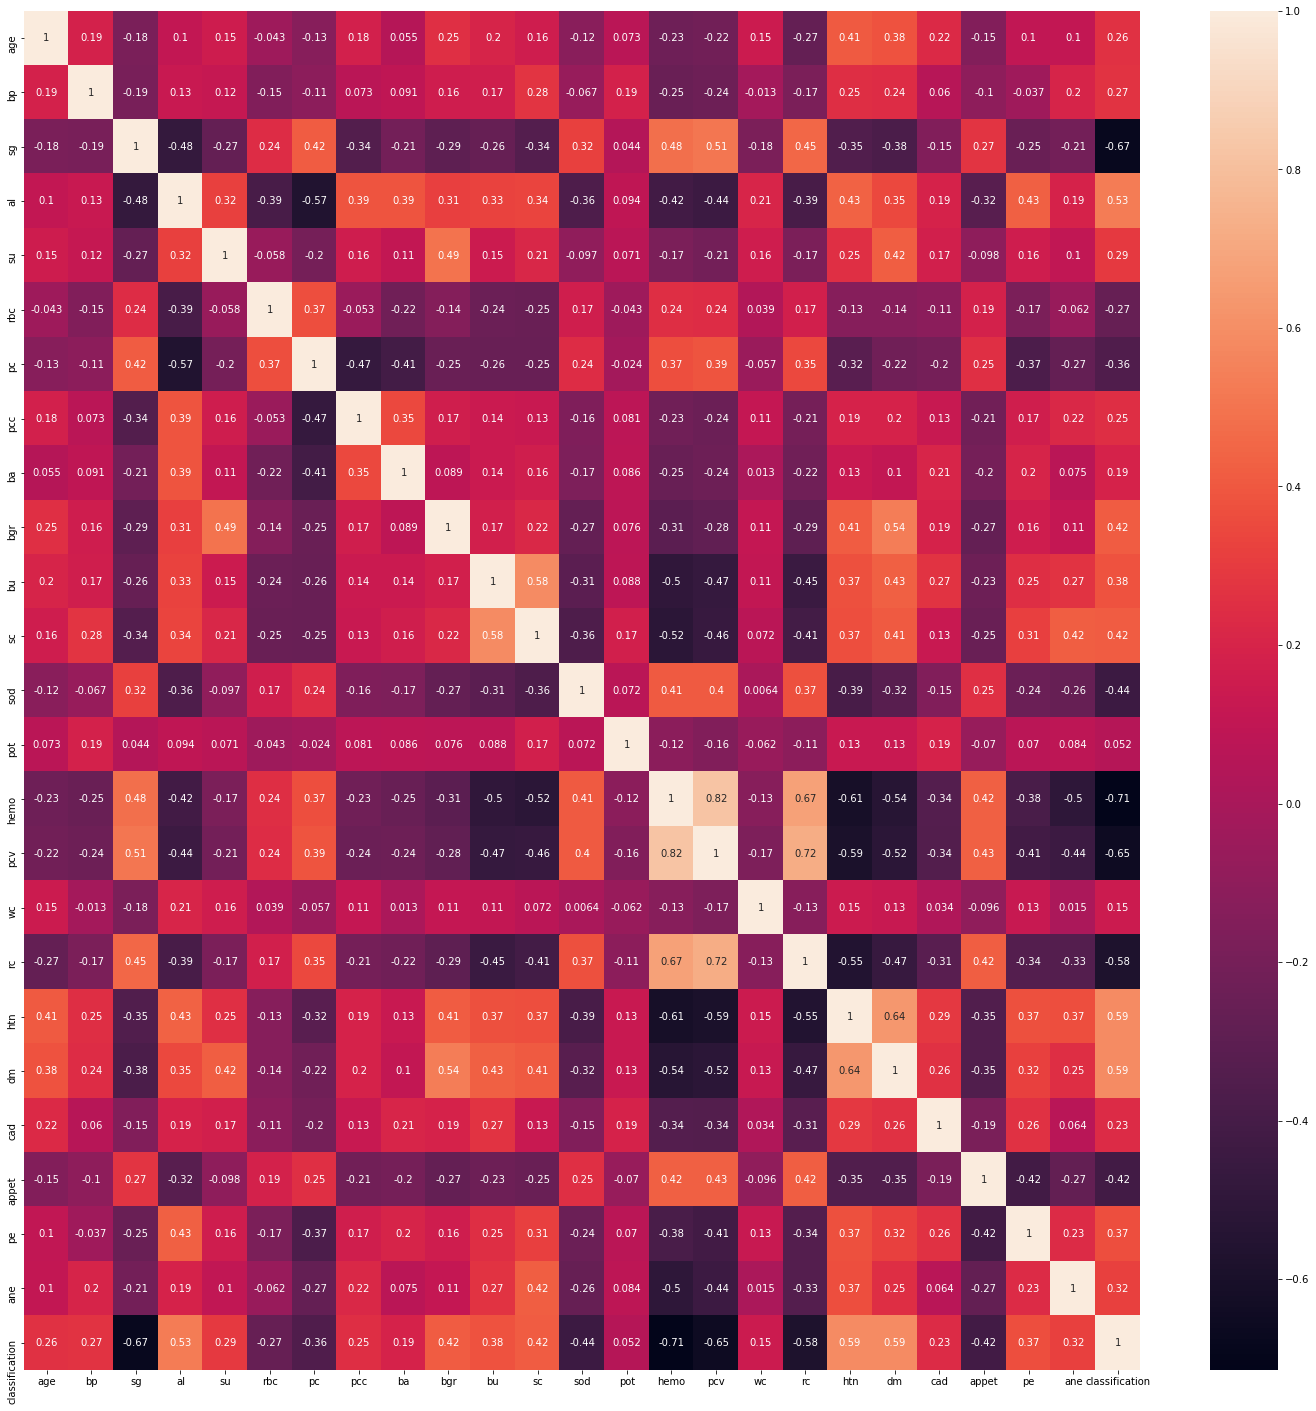

In [44]:
plt.figure(figsize=(25, 25))
Train_df_corr = train_df.corr()
sns.heatmap(Train_df_corr, 
            xticklabels = Train_df_corr.columns.values,
            yticklabels = Train_df_corr.columns.values,
            annot = True);

In [45]:
drop_feat=['hemo','pcv','htn']
train_df.drop(drop_feat,axis=1,inplace=True)

In [46]:
train_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,wc,rc,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,136.0,4.7,7900.0,3.9,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,138.0,4.4,7900.0,4.8,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,139.0,3.7,7900.0,4.8,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,144.0,5.0,7200.0,5.5,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,129.0,4.0,8300.0,4.6,0,0,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
y = train_df['classification']
X = train_df.drop(['classification'], axis = 1)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [50]:
vif

,VIF Factor,features
0,12.558530,age
1,51.380827,bp
2,889.394316,sg
3,3.173260,al
4,1.742589,su
5,13.213630,rbc
6,11.468685,pc
7,1.639871,pcc
8,1.448463,ba
9,12.400958,bgr


In [51]:
drop_feat1=["age","appet","rc","wc","pot","sod","bu","bgr","pc","rbc","sg","bp"]

train_df.drop(drop_feat1,axis=1,inplace=True)

In [52]:
train_df.head()

,al,su,pcc,ba,sc,dm,cad,pe,ane,classification
0,3.0,0.0,0,0,1.7,1,0,0,0,1
1,0.0,0.0,0,0,1.9,1,0,0,0,1
2,0.0,0.0,0,0,5.2,0,0,0,0,1
3,0.0,0.0,0,0,1.0,0,0,0,0,0
4,4.0,0.0,0,1,1.4,0,0,0,0,1


In [53]:
y = train_df['classification']
X = train_df.drop(['classification'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)


X train shape:  (196, 9)
X test shape:  (84, 9)
y train shape:  (196,)
y test shape:  (84,)


In [56]:
norm = MinMaxScaler().fit(X_train)

In [57]:
X_train_norm = norm.transform(X_train)

In [58]:
type(X_train_norm)

numpy.ndarray

In [59]:
X_train_norm

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0.5, 0. , ..., 0. , 1. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [60]:
from sklearn.linear_model import LogisticRegression


In [61]:
clf = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
y_pred


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(y_test, y_pred))

[[35  0]
 [ 6 43]]


In [65]:
print(classification_report( y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        35
           1       1.00      0.88      0.93        49

    accuracy                           0.93        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.94      0.93      0.93        84



In [66]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
clf_random = RandomizedSearchCV(clf, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [69]:
best_clf_random = clf_random.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.95400155        nan 0.95912976        nan        nan
 0.94374514 0.94887335        nan 0.94374514]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [70]:
best_clf_random.best_estimator_

LogisticRegression(C=0.004832930238571752, max_iter=2500, penalty='none',
                   random_state=0, solver='saga')

In [73]:
clf = LogisticRegression(C=0.0048329302385717521, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2500, multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [74]:
print(confusion_matrix(y_test, y_pred))

[[35  0]
 [ 6 43]]


In [75]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        35
           1       1.00      0.88      0.93        49

    accuracy                           0.93        84
   macro avg       0.93      0.94      0.93        84
weighted avg       0.94      0.93      0.93        84



In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

acc=accuracy_score(y_pred,y_test)
acc

0.9285714285714286

In [77]:
from sklearn.ensemble import RandomForestClassifier


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
r2_score(y_train, model.predict(X_train))


0.8734562354384343

In [79]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)
y_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       118

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.92      0.96        49

    accuracy                           0.95        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



In [80]:
acc=accuracy_score(y_pred,y_test)
acc

0.9523809523809523

In [87]:
print(confusion_matrix(y_test, y_pred))

[[35  0]
 [ 4 45]]


In [88]:
Rand_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [89]:
Rand_search = RandomizedSearchCV(estimator=rf,param_distributions=Rand_param,cv=5,n_jobs =-1,verbose = 3)

In [90]:
Rand_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [91]:
Rand_search.best_params_

{'n_estimators': 130,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'gini'}

In [92]:
rand_clf = RandomForestClassifier(n_estimators=130,
 min_samples_split=8,
 min_samples_leaf=2,
 max_features= 'log2',
 max_depth= 12,
 criterion= 'gini')

In [93]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [94]:
y_pred=rf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_pred,y_test)

In [96]:
acc

0.9523809523809523

In [97]:
cm=confusion_matrix(y_pred,y_test)

In [98]:
cm

array([[35,  4],
       [ 0, 45]], dtype=int64)

In [104]:
y_score2 = rf.predict_proba(X_test)[:,1]
y_score1 = clf.predict_proba(X_test)[:,1]

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
print('roc_auc_score for Random forest: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score2))

roc_auc_score for Random forest:  0.9862973760932944
roc_auc_score for KNN:  0.9591836734693877


In [107]:
import pickle

In [109]:
train_df.head()

,al,su,pcc,ba,sc,dm,cad,pe,ane,classification
0,3.0,0.0,0,0,1.7,1,0,0,0,1
1,0.0,0.0,0,0,1.9,1,0,0,0,1
2,0.0,0.0,0,0,5.2,0,0,0,0,1
3,0.0,0.0,0,0,1.0,0,0,0,0,0
4,4.0,0.0,0,1,1.4,0,0,0,0,1


In [108]:
pickle.dump(rf, open("kidney.pkl", "wb"))


In [ ]:
filename = 'Kidney.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)